Introduction:

1. Market researchers spend a lot to attract new customers as compared to expenses on retaining the current customers.
2. To maintain and extend business, one ought to realize being able to hold existing customers is as crucial as finding new customers.
3. If the rate of customer retention is greater than the rate of new customers, then the database as a whole is reducing if existing customers go off then transactions will be less.
4. In a way, holding current customers’ priority exceeds looking for new customers.

## **DESCRIPTION**

## **Problem Statement**
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

## **Dataset Description**
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

The features in the given dataset are:

1. **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. **Description:** Product (item) name. Nominal.
4. **Quantity:** The quantities of each product (item) per transaction. Numeric.
5. **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
6. **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
7. **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. **Country:** Country name. Nominal, the name of the country where each customer resides

In [1]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Online Retail dataset.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [5]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [6]:
# Checking Null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# WE will drop null values
df = df.dropna()

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

What is RFM Analysis?

RFM analysis is basically scoring our customers based on their Recency, Frequency and Monetary values.
Let’s understand what Recency, Frequency and Monetary are.

1. **Recency**: How recently a customer made a purchase.
For example, If you buy something on January 1th and today is February 1th your recency is 30 days.

2. **Frequency**: How often customers make a purchase.
This is the number of orders that you made from your first purchase date. If you buy a t-shirt on January 1th and buy jeans on January 15th Your frequency is 2.

3. **Monetary Value**: How much money a customer spends on purchases.
Let’s refer to the previous example where you made 2 purchases. The T-shirt costs you 20 dollars and the jeans are 35dollars. Your monetary value is 55 $.

**Note:** Sometimes monetary value can be the average spending of each customer.

# EDA 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df[df['Quantity'] < 0].shape

(8905, 8)

In [12]:
df[df['UnitPrice'] < 0].shape

(0, 8)

As Quantity cannot be negative , so we will remove it.

In [13]:
# drop negative values
df.drop(df[df['Quantity'] < 0].index, inplace = True)

In [14]:
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)


In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Monetary DataFrame:

In [16]:
#creating monetary dataframe
df['Amount'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.rename(columns={'Amount':'Monetary'},inplace =True)
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [17]:
monetary.shape

(4339, 2)

**Frequency DataFrame:** We are calculating the frequency of customers by counting Invoice numbers of each customer, the more the count the more often the customer buys from the store.

In [18]:
#creating frequency Dataframe:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns= ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [19]:
frequency.shape

(4339, 2)

**Recency DataFrame:** We are calculating recency by subtracting the very recent date with the last transaction date of the customers.    

In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')


In [21]:
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
 
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In RFM (Recency, Frequency, Monetary) analysis, recency refers to how recently a customer has made a purchase. The goal is to understand customer behavior based on these three factors. For recency specifically:

Recency (R): It represents the time since a customer's last purchase. In RFM analysis, a lower recency value is often considered better, indicating a more recent purchase and potentially a more engaged customer.
**By using min() in the code, it calculates the minimum time difference ('Diff') for each customer. This means it's finding the most recent purchase date for each customer. In RFM analysis, you typically want to identify customers who have made a purchase most recently, as they may be more likely to make another purchase in the future.**

So, taking the minimum recency value for each customer helps to capture the customer who has made the most recent purchase within the dataset. This aligns with the idea that a lower recency value is associated with more recent and potentially more valuable customer behavior.

In [22]:
recency['Diff'] = recency['Diff'].dt.days

In [23]:
recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


We will merge all the columns of recency, monetary and frequency into one dataframe named rfm along with the CustomerID

## Combining RFM dataframe

In [24]:
rfm = pd.merge(recency, frequency, on='CustomerID', how ='inner')
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [25]:
rfm.shape

(4339, 4)

<AxesSubplot: xlabel='Recency'>

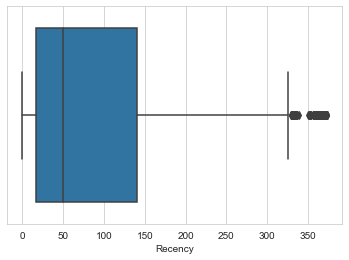

In [26]:
sns.set_style("whitegrid")  
sns.boxplot(x = 'Recency', data = rfm, orient='h')

<AxesSubplot: xlabel='Frequency'>

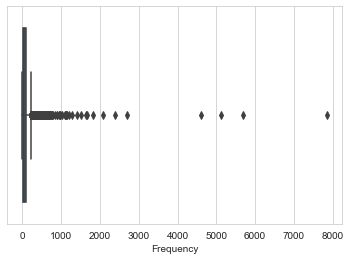

In [27]:
sns.boxplot(x = 'Frequency', data = rfm, orient='h') 

<AxesSubplot: xlabel='Monetary'>

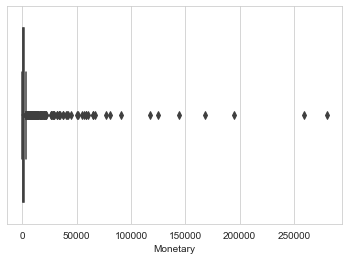

In [28]:
sns.boxplot(x = 'Monetary', data = rfm, orient='h')

***From the boxplots, we can observe that dataset suffers from outliers which might cause inaccurate predictions. Hence, we will use Standard scaler to scale the values of the columns.***

In [29]:
scaler = StandardScaler()
rfm_normalized = rfm[['Monetary','Frequency','Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,77183.60,1,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4334,180.60,10,277
4335,80.82,7,180
4336,178.05,12,7
4337,2094.88,756,3


In [30]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.columns = ['Monetary','Frequency','Recency']

In [31]:
rfm_normalized.head()

,Monetary,Frequency,Recency
0,8.359634,-0.396512,2.334858
1,0.251046,0.394688,-0.905199
2,-0.028546,-0.265374,-0.175186
3,-0.032963,-0.081781,-0.735196
4,-0.191315,-0.326572,2.174855


In [32]:
rfm_normalized.shape

(4339, 3)

**K Means Clustering**

1. Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K distinct clusters. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as far as possible. 
2. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

We have used two methods to decide K value for the K-Means clustering: one is elbow method and another is silhouette score.

**The objective of the K-means algorithm is to minimize the sum of squared distances between data points and their respective cluster centroids. This is often referred to as the "inertia" or "within-cluster sum of squares."**  (WCSS)

The algorithm tries to achieve two main criteria:

***Intra-cluster Similarity: It aims to make the data points within each cluster as similar as possible, by minimizing the distance between the data points and their cluster centroid.***

***Inter-cluster Separation: It aims to keep the centroids of different clusters as far apart as possible.***

**Elbow Curve Method:**

***The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.***


WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

1. A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. 
2. The Elbow Method is one of the most popular methods to determine this optimal value of k.
3. Here, we have tried to plot the cluster numbers as the x-axis and their respective score on the y axis (i.e. WCSS value) 
4. By observing the graph, using the elbow method dividing the data frame into 3 clusters gives proper results.

In [33]:
wcss = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

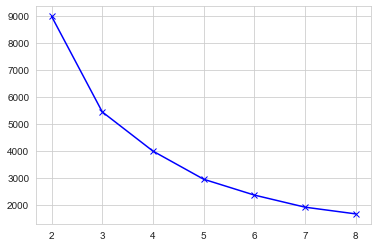

In [34]:
plt.plot(range_n_clusters,wcss,'bx-')

**Silhouette Score**

***Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.***
1. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
2. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
3. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

**Silhouette Analysis**
silhouette score=(𝑝−𝑞)/𝑚𝑎𝑥(𝑝,𝑞)

1. p is the mean distance to the points in the nearest cluster that the data point is not a part of [6]
2. q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.
1. A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
2. A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

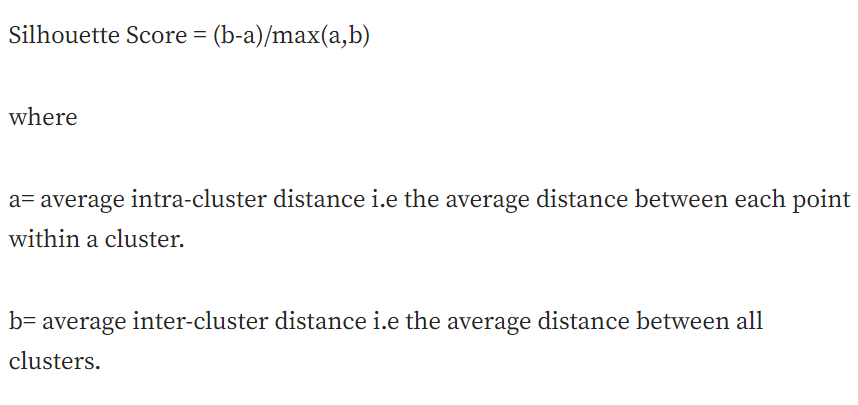

In [35]:
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = num_cluster, max_iter=50)
    kmeans.fit(rfm_normalized)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters = {0}, the silhoutte score is {1}".format(num_cluster, silhouette_avg))

For n_clusters = 2, the silhoutte score is 0.9311939886536421
For n_clusters = 3, the silhoutte score is 0.6020142101419289
For n_clusters = 4, the silhoutte score is 0.6009835311532788
For n_clusters = 5, the silhoutte score is 0.6175769748163881
For n_clusters = 6, the silhoutte score is 0.5918299593472842
For n_clusters = 7, the silhoutte score is 0.523391866158746
For n_clusters = 8, the silhoutte score is 0.5109608433169535


-0.11040254512018817


SilhouetteVisualizer(ax=<AxesSubplot: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

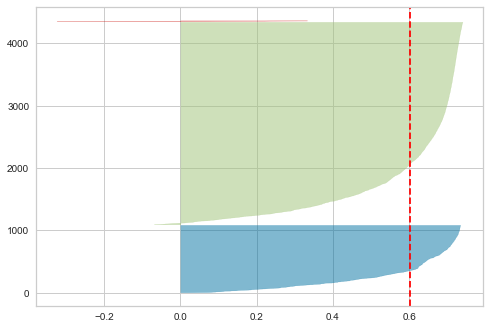

In [36]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rfm_normalized)
rfm_normalized['clusters']= y_predicted
rfm_normalized
new2_df = pd.DataFrame(scaler.inverse_transform(rfm_normalized[['Monetary','Frequency','Recency']] ), columns =['Monetary','Frequency','Recency'])
from sklearn.metrics import silhouette_score
score = silhouette_score(new2_df, km.labels_, metric='euclidean')
print(score)
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(rfm_normalized.drop("clusters" ,axis =1 ))

Finalized the model with N_clusters = 3 based on above analysis. Now, we will fit the model finalized with 3 clusters.

In [38]:
kmeans = KMeans(n_clusters=3, max_iter =50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=3)

In [39]:
rfm_normalized.loc[:,'CustomerID'] = rfm['CustomerID']
rfm_normalized.head()

,Monetary,Frequency,Recency,clusters,CustomerID
0,8.359634,-0.396512,2.334858,0,12346.0
1,0.251046,0.394688,-0.905199,1,12347.0
2,-0.028546,-0.265374,-0.175186,1,12348.0
3,-0.032963,-0.081781,-0.735196,1,12349.0
4,-0.191315,-0.326572,2.174855,0,12350.0


In [40]:
rfm_normalized["Cluster No."] = kmeans.labels_
rfm_normalized.head()

,Monetary,Frequency,Recency,clusters,CustomerID,Cluster No.
0,8.359634,-0.396512,2.334858,0,12346.0,1
1,0.251046,0.394688,-0.905199,1,12347.0,0
2,-0.028546,-0.265374,-0.175186,1,12348.0,0
3,-0.032963,-0.081781,-0.735196,1,12349.0,0
4,-0.191315,-0.326572,2.174855,0,12350.0,1


Now, the customers are divided into 3 groups, the last cluster people are the ones who spent more.

<AxesSubplot: xlabel='Cluster No.', ylabel='Monetary'>

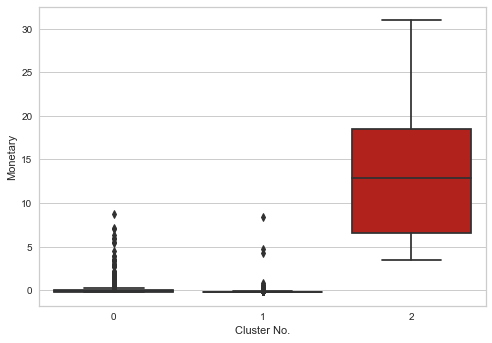

In [41]:
sns.boxplot(x='Cluster No.', y='Monetary', data = rfm_normalized)

<AxesSubplot: xlabel='Cluster No.', ylabel='Frequency'>

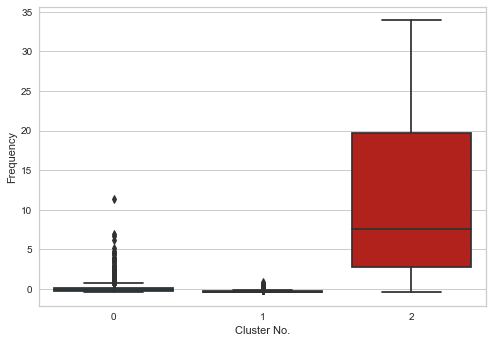

In [42]:
sns.boxplot(x='Cluster No.', y='Frequency', data = rfm_normalized)

<AxesSubplot: xlabel='Cluster No.', ylabel='Recency'>

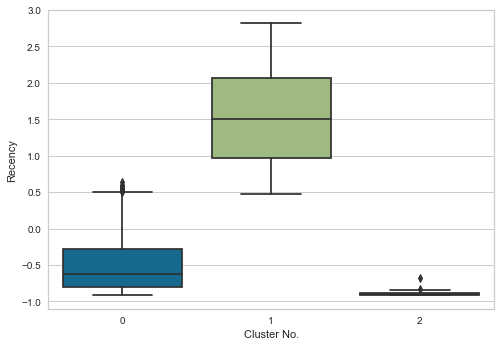

In [43]:
sns.boxplot(x='Cluster No.', y='Recency', data = rfm_normalized)

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

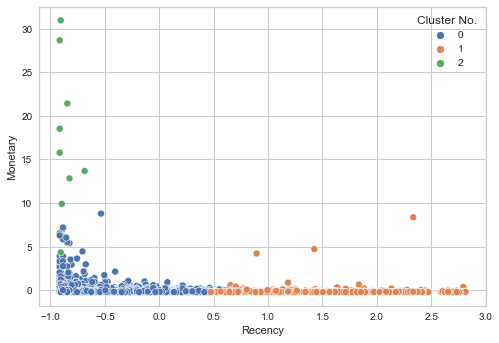

In [44]:
sns.scatterplot(x='Recency', y='Monetary',hue='Cluster No.', data=rfm_normalized,palette="deep")

<AxesSubplot: xlabel='Frequency', ylabel='Monetary'>

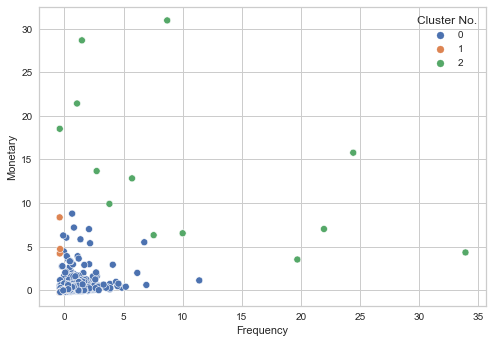

In [45]:
sns.scatterplot(x='Frequency', y='Monetary',hue='Cluster No.', data=rfm_normalized,palette="deep")

<AxesSubplot: xlabel='Recency', ylabel='Frequency'>

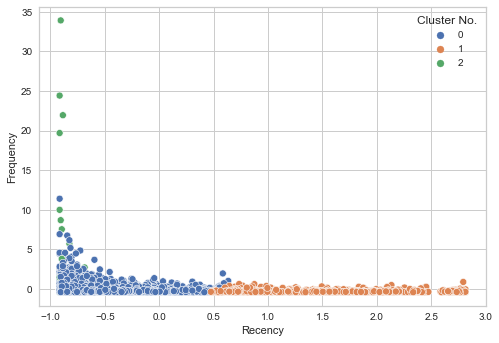

In [46]:
sns.scatterplot(x='Recency', y='Frequency',hue='Cluster No.', data=rfm_normalized,palette="deep")

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

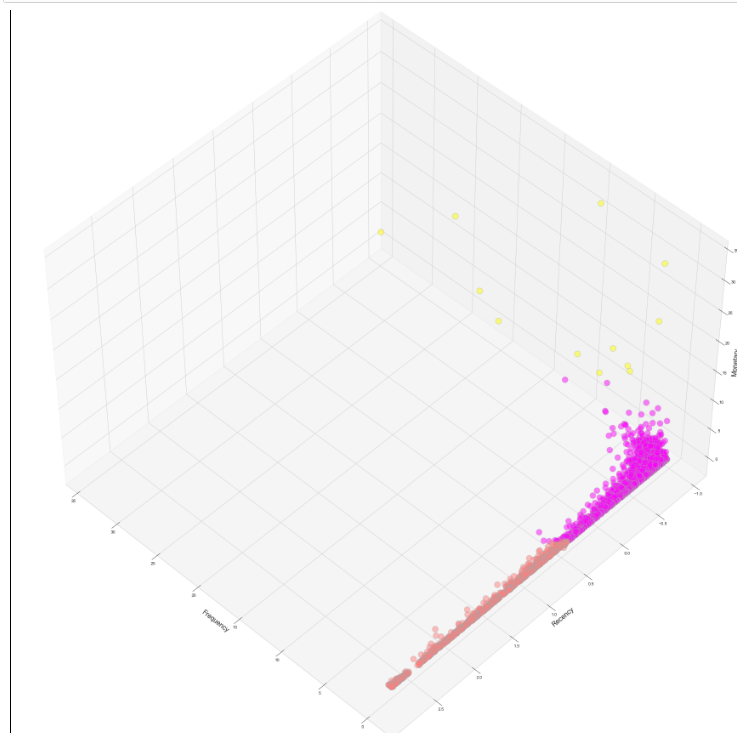

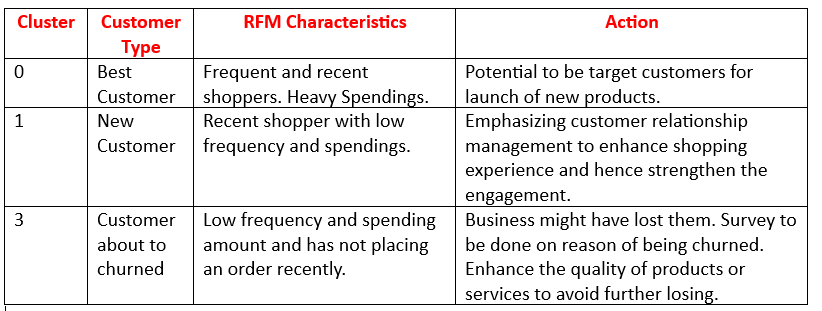